<a href="https://colab.research.google.com/github/Yneq/tibami/blob/main/tibame_crawler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

WIN: -headers "Origin: https://ani.gamer.com.tw" -i "" anime.mp4

MAC: -headers 'Origin: https://ani.gamer.com.tw' -i '' anime.mp4

ffmpeg(用拉的) 複製並且把-i後面的""填入m3u8

編碼: 我 -> 0101010
解碼: 01110 -> 我

現在只有一套: 萬國碼(Unicode): utf-8

因為WIN預設編碼: ANSI 繁體(BIG-5)

In [ ]:
f = open("a.txt", "w", encoding="utf-8")
# 以前: write(f, "abcde")
# 專屬(型態)功能: f.write("abcde")
# 特殊字元(換行/TAB\backspace)
# \(跳脫字元)字母
# \n: 換行 \t: TAB
f.write("abcde\n")
f.write("12345\n")
# 以前: close(f)
# 專屬: f.close()
f.close()

In [ ]:

f = open("a.txt", "r", encoding="utf-8")
# 以前: content = read(f)
# 現在: content = f.read()
content = f.read()
print(content)
f.close()

abcde
12345



爬蟲"動畫瘋"的彈幕
自存檔案

In [7]:
import json
import urllib.request as req

url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()
# print(content)
#content 是bytes形態，要轉換成list/dict形態
content_convert = json.loads(content)

f = open("danmu.tsv", "w", encoding="utf-8")
f.write("ID\tTEXT\n")

data = content_convert["data"]
danmu_list = data["danmu"]
for danmu in danmu_list:
    userid = danmu["userid"]
    text = danmu["text"]
    # print(userid, text)
    line = '"' + userid + '"\t"' + text + '"\n'
    f.write(line)
f.close()

pandas 表格處理

In [23]:
import json
import urllib.request as req
import pandas as pd

url = "https://api.gamer.com.tw/anime/v1/danmu.php?videoSn=36632&geo=TW%2CHK"
f = req.urlopen(url)
content = f.read()
# print(content)
#content 是bytes形態，要轉換成list/dict形態
content_convert = json.loads(content)

data = content_convert["data"]
danmu_list = data["danmu"]

# 型態轉換: list->pandas自訂義表格型態(DataFrame)
table = pd.json_normalize(danmu_list)
# 專屬功能: to_xxxx
# 如果你不需要列標籤, 就多帶index=False
table.to_csv("chiikawa.tsv", sep="\t", encoding="utf-8")

In [22]:
import pandas as pd
df = pd.read_csv("chiikawa.tsv", sep="\t", encoding="utf-8")
# 取行操作: 跟字典依樣 [行]
df["text"]
# 多行取行: 把你所有要的行放在一個list裡
cols = ["userid", "text"]
df2 = df[cols]
df2

,userid,text
0,s970446,謝謝巴哈大哥
1,wex690825,第一次
2,z80262001,0.0
3,ouyang318,耶
4,qaz1210731,二刷
...,...,...
482,g840483938,泡泡驗超市和看
483,ZED8090,ZMB
484,kekerry75,😀
485,linzzi,沒了？？？？


In [26]:
df["userid"].value_counts()

,count
userid,
st5109185,10
annana566,7
g840483938,6
loenyen73,4
Bananaaa,4
...,...
ox22081,1
yiling0807,1
rwan123,1


In [32]:
# pandas必會1. 篩選
# df[帶入跟你資料筆數依樣多的true/false]
# demo
fil = [True, False, True, False, True]
df.head(5)[fil]

,Unnamed: 0,text,color,size,position,time,sn,userid
0,0,謝謝巴哈大哥,#FFFFFF,1,0,0,37089407,s970446
2,2,0.0,#FFFFFF,1,0,0,40729192,z80262001
4,4,二刷,#FFFFFF,1,0,0,42903755,qaz1210731


In [29]:
check = "st5109185"
fil = df["userid"] == check
df[fil]

,Unnamed: 0,text,color,size,position,time,sn,userid
44,44,二刷,#FFFFFF,1,0,59,44529553,st5109185
86,86,好可愛,#FFFFFF,1,0,114,44529401,st5109185
107,107,8,#FFFFFF,1,0,133,44529558,st5109185
201,201,烏薩奇寶貝,#FFFFFF,1,0,323,44529406,st5109185
242,242,哇,#FFFFFF,1,0,400,44529562,st5109185
279,279,好想吃,#FFFFFF,1,0,480,44529563,st5109185
316,316,西,#00FF91,1,0,549,44529412,st5109185
408,408,西西不西西,#FFFFFF,1,0,717,44529568,st5109185
477,477,诶,#FF0026,1,0,866,44529573,st5109185
486,486,哈,#FF0026,1,0,901,44529579,st5109185


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '(-0.901, 60.067]'),
  Text(1, 0, '(60.067, 120.133]'),
  Text(2, 0, '(120.133, 180.2]'),
  Text(3, 0, '(180.2, 240.267]'),
  Text(4, 0, '(240.267, 300.333]'),
  Text(5, 0, '(300.333, 360.4]'),
  Text(6, 0, '(360.4, 420.467]'),
  Text(7, 0, '(420.467, 480.533]'),
  Text(8, 0, '(480.533, 540.6]'),
  Text(9, 0, '(540.6, 600.667]'),
  Text(10, 0, '(600.667, 660.733]'),
  Text(11, 0, '(660.733, 720.8]'),
  Text(12, 0, '(720.8, 780.867]'),
  Text(13, 0, '(780.867, 840.933]'),
  Text(14, 0, '(840.933, 901.0]')])

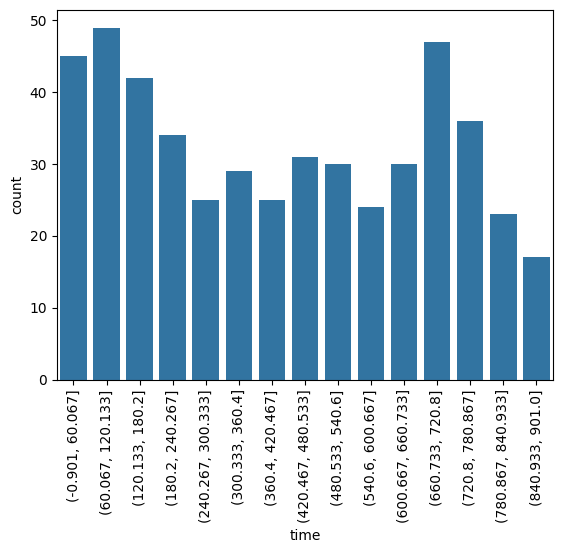

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

time_cut = pd.cut(df["time"], bins=15)
sns.countplot(x=time_cut)
plt.xticks(rotation=90)

In [35]:
# and: & or: |
fil = (df["time"] >= 660) & (df["time"] <= 720)
df[fil]

,Unnamed: 0,text,color,size,position,time,sn,userid
363,363,時間小偷,#FFFFFF,1,0,660,37089286,nitama487
364,364,這到底是三小,#FF0026,2,2,663,42532176,rosa0812
365,365,體感90秒,#FFFFFF,1,0,665,37188419,chi525051
366,366,沒了就這樣靠腰啊,#FFFFFF,1,0,665,41819554,Tyhbnvfg
367,367,與,#FFFFFF,1,0,666,43967797,TONKEN
368,368,精神時光屋,#FFFFFF,1,0,667,37102737,sevenwgsss
369,369,期待小八出場！,#FFFFFF,1,0,667,37138685,amazingcaty
370,370,蛤,#FFFFFF,1,0,667,40706383,tiyu1118
371,371,體感一分鐘,#FFFFFF,1,0,671,37175957,Pooooooooooo
372,372,不看聲優表死都認不出兔子是小澤亞李,#FFFFFF,1,0,672,37106452,Tomachen
